# **LAB2-3 SVR**

In [308]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR 
from sklearn import preprocessing 
from sklearn import metrics 
import pandas_datareader.data as web 
import yfinance as yf 
import datetime 

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [309]:
### START CODE HERE ###
# รหัสหุ้น Technology 3 ตัว
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
# อัตราแลกเปลี่ยนสกุลเงิน
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
# ค่าดัชนีตลาดหุ้น
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2024-01-25')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed

### **Exploring the Data**

In [310]:
stk_data

Adj Close                               Close              \
                 GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   85.148712   96.450592   52.248001  108.671127   
2019-01-02   52.734001   86.302299   96.023270   52.734001  110.143402   
2019-01-03   51.273499   84.579399   92.490791   51.273499  107.944550   
2019-01-04   53.903500   87.882881   96.792435   53.903500  112.160614   
2019-01-07   53.796001   88.504616   96.915878   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2024-01-18  143.479996  166.839996  393.869995  143.479996  166.839996   
2024-01-19  146.380005  171.479996  398.670013  146.380005  171.479996   
2024-01-22  145.990005  172.830002  396.510010  145.990005  172.830002   
2024-01-23  147.039993  173.940002  398.899994  147.039993  173.940002   
2024-01-24  148.699997  173.929993  402.559998  148.699997  173.929993   

                              High                                 Low  \
                  MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2024-01-18  393.869995  144.210007  166.990005  393.989990  141.990005   
2024-01-19  398.670013  146.449997  171.580002  398.670013  144.380005   
2024-01-22  396.510010  148.389999  174.449997  400.619995  145.839996   
2024-01-23  398.899994  147.179993  174.020004  399.380005  145.500000   
2024-01-24  402.559998  149.850006  174.860001  405.630005  148.100006   

                                          Open                          \
                   IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2024-01-18  165.039993  390.119995  142.050003  166.490005  391.720001   
2024-01-19  169.179993  393.500000  144.740005  170.589996  395.760010   
2024-01-22  172.399994  393.589996  147.100006  172.820007  400.019989   
2024-01-23  172.479996  393.929993  145.889999  172.899994  395.750000   
2024-01-24  172.899994  400.450012  148.539993  174.759995  401.540009   

              Volume                     
               GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2024-01-18  25746400  3776900  23392100  
2024-01-19  33300700  6925800  29272000  
2024-01-22  32200400  4926000  27016900  
2024-01-23  21636100  3983500  20525900  
2024-01-24  25209000  8957800  24622300  

[1275 rows x 18 columns]

In [311]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-01-28,109.20,1.3158
2019-01-29,109.36,1.3146
2019-01-30,109.57,1.3062
2019-01-31,108.84,1.3135
2019-02-01,109.55,1.3094
...,...,...
2024-01-15,NaN,NaN
2024-01-16,147.01,1.2657
2024-01-17,148.39,1.2666


In [312]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-01-28,2643.85,24528.22,18.87
2019-01-29,2640.00,24579.96,19.13
2019-01-30,2681.05,25014.86,17.66
2019-01-31,2704.10,24999.67,16.57
2019-02-01,2706.53,25063.89,16.14
...,...,...,...
2024-01-18,4780.94,37468.61,14.13
2024-01-19,4839.81,37863.80,13.30
2024-01-22,4850.43,38001.81,13.19


Let's 
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [313]:
### START CODE HERE ###
base = stk_data['Adj Close']['MSFT']
X1 = stk_data['Adj Close'][['IBM', 'GOOGL']]
X2 = ccy_data
X3 = idx_data
### END CODE HERE ###

Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for past or next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [314]:
### START CODE HERE ###
return_period = 3
k = [3, 6, 12]

Y = base.shift(-return_period)

### Choose calculation of difference price either past (Guide#1) or next (Guide#2) 

### Guide#1 for using price of past [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period)})

### Guide#2 for using price of next [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period).shift(-k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period).shift(-k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period).shift(-k[2]*return_period)})


X4 = pd.concat([X4_3DT,X4_6DT,X4_12DT],axis=1)
### END CODE HERE ###

**Standardize `X1-4`**

***NOTE:*** Please ensure that each of ***X1-4's index columns*** is the ***date column***.

In [315]:
### START CODE HERE ###

standard_scaler = preprocessing.StandardScaler()
# Standardize by group
X1_standardized = standard_scaler.fit_transform(X1)
X2_standardized = standard_scaler.fit_transform(X2)
X3_standardized = standard_scaler.fit_transform(X3)
X4_standardized = standard_scaler.fit_transform(X4)


#Standardize
X1 = pd.DataFrame(X1_standardized, columns=X1.columns, index=X1.index)
X2 = pd.DataFrame(X2_standardized, columns=X2.columns, index=X2.index)
X3 = pd.DataFrame(X3_standardized, columns=X3.columns, index=X3.index)
X4 = pd.DataFrame(X4_standardized, columns=X4.columns, index=X4.index)

### END CODE HERE ###

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [316]:
### START CODE HERE ###
X_standardized = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([X_standardized, Y], axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [317]:
dataset

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
2018-12-31,-1.922157,-1.553107,NaN,NaN,NaN,NaN,NaN,-0.147813,-0.048497,0.062641,96.792435
2019-01-02,-1.851666,-1.536860,NaN,NaN,NaN,NaN,NaN,0.141427,-0.152566,0.111985,96.915878
2019-01-03,-1.956946,-1.585685,NaN,NaN,NaN,NaN,NaN,0.488344,0.288341,0.318686,97.618584
2019-01-04,-1.755082,-1.497764,NaN,NaN,NaN,NaN,NaN,0.166874,-0.110690,0.101519,99.014496
2019-01-07,-1.717090,-1.501357,NaN,NaN,NaN,NaN,NaN,0.290713,-0.220303,0.089072,98.378273
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,3.069706,1.496787,1.861636,-0.218846,1.583072,1.660549,-0.863864,NaN,NaN,NaN,398.899994
2024-01-19,3.353240,1.593734,1.865593,-0.233891,1.676604,1.762591,-0.964287,NaN,NaN,NaN,402.559998
2024-01-22,3.435734,1.580696,NaN,NaN,1.693477,1.798227,-0.977596,NaN,NaN,NaN,NaN
2024-01-23,3.503562,1.615798,NaN,NaN,1.715990,1.773346,-1.055031,NaN,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [318]:
### START CODE HERE ###
dataset = dataset.dropna()

### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1206 entries, 2019-01-28 to 2023-11-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IBM        1206 non-null   float64
 1   GOOGL      1206 non-null   float64
 2   DEXJPUS    1206 non-null   float64
 3   DEXUSUK    1206 non-null   float64
 4   SP500      1206 non-null   float64
 5   DJIA       1206 non-null   float64
 6   VIXCLS     1206 non-null   float64
 7   MSFT_3DT   1206 non-null   float64
 8   MSFT_6DT   1206 non-null   float64
 9   MSFT_12DT  1206 non-null   float64
 10  MSFT       1206 non-null   float64
dtypes: float64(11)
memory usage: 113.1 KB


,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,-0.061244,-0.018107,-0.043916,0.005772,-0.045281,-0.048288,0.034176,-0.008263,-0.005453,-0.000094,231.913683
std,0.871276,0.978639,0.977658,1.013846,0.981382,0.977091,1.005753,1.006792,1.009170,1.005818,70.608347
min,-2.531753,-1.563504,-1.148141,-3.203793,-2.458083,-3.213609,-1.177234,-3.216606,-3.669039,-3.331925,97.599579
25%,-0.747878,-0.944249,-0.779257,-0.736021,-1.023031,-0.991200,-0.631559,-0.485402,-0.568237,-0.479515,173.213558
50%,-0.078192,0.043581,-0.607925,0.021124,0.195278,0.242286,-0.194777,0.037351,0.048165,0.059651,239.659302
75%,0.487063,0.829439,0.908342,0.729371,0.800882,0.786325,0.483384,0.601796,0.584870,0.609005,286.936905
max,2.563745,1.709352,2.086561,2.039423,1.607888,1.487817,7.431357,2.959090,2.893972,3.143744,382.700012


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [319]:
### START CODE HERE ###
Y = dataset['MSFT']
X = dataset[dataset.columns.difference(['MSFT'])]

### END CODE HERE ###

**Calculate the Correlation**

1. Drop columns that have correlation more than 0.9.
2. Show Dropped Columns

In [320]:
### START CODE HERE ###
x_corr = X.corr()
# don't count 1.0 detect only 0.9
mark = (x_corr.abs() > 0.9) & (x_corr.abs() < 1.0)

toDrop = [column for column in mark.columns if any(mark[column])]

X = X.drop(columns=toDrop)
### END CODE HERE ###

In [321]:
X

,DEXJPUS,DEXUSUK,IBM,MSFT_12DT,MSFT_3DT,MSFT_6DT,VIXCLS
2019-01-28,-0.707525,0.489778,-0.979212,0.203775,-0.138482,0.127246,-0.290361
2019-01-29,-0.696972,0.471724,-0.976467,0.426956,0.007408,0.297367,-0.258903
2019-01-30,-0.683120,0.345345,-0.974177,0.122258,-0.145269,0.133154,-0.436762
2019-01-31,-0.731271,0.455175,-0.972346,0.240144,0.013345,0.241481,-0.568643
2019-02-01,-0.684439,0.393490,-0.986994,0.327599,0.160936,0.334433,-0.620670
...,...,...,...,...,...,...,...
2023-11-24,1.955299,-0.348234,2.357205,0.404837,-0.767342,-0.706253,-1.065921
2023-11-27,1.910446,-0.330179,2.381037,0.580205,-0.579762,-0.593417,-1.038093
2023-11-28,1.812825,-0.179728,2.385925,0.277430,-1.206816,-0.791206,-1.038093
2023-11-29,1.811506,-0.214332,2.432366,0.579719,-0.587803,-0.536352,-1.003005


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [322]:
### START CODE HERE ###

test_size = 0.3
train_size = 0.7
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size)
### START CODE HERE ###

**Initialize models**
- `Linear Regression`
- `Support Vector Regression` which `kernels` are `['linear','rbf','poly']` and `C` value are `[0.1, 1, 10, 100]`
- `Linear Regression` with `Gradient Descent` from `Lab2-2`


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>

In [323]:
### START CODE HERE ###

# LinearRegression
linear_regression_model = LinearRegression()

# SVR
l_SVR_model0 = SVR(kernel='linear',C=0.1)
l_SVR_model1 = SVR(kernel='linear',C=1)
l_SVR_model10 = SVR(kernel='linear',C=10)
l_SVR_model100 = SVR(kernel='linear',C=100)

r_SVR_model0 = SVR(kernel='rbf', C=0.1)
r_SVR_model1 = SVR(kernel='rbf', C=1)
r_SVR_model10 = SVR(kernel='rbf', C=10)
r_SVR_model100 = SVR(kernel='rbf', C=100)

p_SVR_model0 = SVR(kernel='poly', C=0.1)
p_SVR_model1 = SVR(kernel='poly', C=1)
p_SVR_model10 = SVR(kernel='poly', C=10)
p_SVR_model100 = SVR(kernel='poly', C=100)

# Gradient Descent
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01

### END CODE HERE ###

**Train models**

Train all models with at least two X's columns.

<span style='color: orange;'>**BONUS POINTS**</span> for those who train with more than two or all X's columns.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fit()`
- For the gradient descent, you'll need to perform multivariate gradient descent by yourself. Vectorizing or using matrices might make things easier.
</details>

In [324]:
### START CODE HERE ###

# train Linear Regression
linear_regression_model.fit(X_train, Y_train)

# train SVR models
l_SVR_model0.fit(X_train, Y_train)
l_SVR_model1.fit(X_train, Y_train)
l_SVR_model10.fit(X_train, Y_train)
l_SVR_model100.fit(X_train, Y_train)

r_SVR_model0.fit(X_train, Y_train)
r_SVR_model1.fit(X_train, Y_train)
r_SVR_model10.fit(X_train, Y_train)
r_SVR_model100.fit(X_train, Y_train)

p_SVR_model0.fit(X_train, Y_train)
p_SVR_model1.fit(X_train, Y_train)
p_SVR_model10.fit(X_train, Y_train)
p_SVR_model100.fit(X_train, Y_train)

# train Gradient Descent
# create empty array follow X_train size + 1(date/bias)
theta = np.zeros(X_train.shape[1]+1)
def gradient_descent(t,x,y,alpha):
    m = len(y)
    hb = x.dot(t[1:]) + t[0] # hypothesis

    grad_j_theta = np.zeros_like(theta)
    grad_j_theta[0] = 2/m * np.sum(hb - y)
    grad_j_theta[1:] = 2/m * x.T.dot(hb - y)

    # update parameter
    t = t - alpha * grad_j_theta

    return t

for i in range(1000):
    theta = gradient_descent(theta,X_train,Y_train,alpha)
    print(theta)
### END CODE HERE ###

[ 4.64060238e+00  7.82850951e-01  6.02592474e-02  6.10711252e-01
 -2.08018975e-01 -2.04998723e-01 -2.84731416e-01 -2.18964396e-03]
[ 9.18891225e+00  1.54427045e+00  1.31503210e-01  1.20537262e+00
 -4.03961472e-01 -3.95299269e-01 -5.53185871e-01  6.70651335e-04]
[ 1.36467748e+01  2.28502044e+00  2.13206450e-01  1.78456828e+00
 -5.88489998e-01 -5.71650813e-01 -8.06176391e-01  8.34232645e-03]
[18.01599797  3.00583312  0.30486448  2.34885803 -0.76223366 -0.73476667
 -1.04447688  0.02059809]
[22.29835322  3.7074121   0.40599298  2.89877839 -0.9257898  -0.88532597
 -1.26882398  0.03722135]
[26.49557629  4.39043364  0.51612695  3.43484359 -1.0797255  -1.02397531
 -1.47991882  0.05800571]
[30.60936793  5.0555477   0.63482001  3.95754653 -1.22457909 -1.15133025
 -1.67842874  0.08275449]
[34.6413946   5.70337903  0.76164368  4.46735973 -1.36086151 -1.26797677
 -1.86498886  0.11128018]
[38.59328919  6.33452821  0.89618664  4.96473616 -1.48905768 -1.3744727
 -2.04020363  0.14340407]
[42.46665174  

**Evaluate models**

Evaluate models with test set


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.predict()`
</details>

In [325]:
### START CODE HERE ###

# test Linear Regression
linear_regression_p = linear_regression_model.predict(X_test)

# test SVR models
l_SVR_p0 = l_SVR_model0.predict(X_test)
l_SVR_p1 = l_SVR_model1.predict(X_test)
l_SVR_p10 = l_SVR_model10.predict(X_test)
l_SVR_p100 = l_SVR_model100.predict(X_test)

r_SVR_p0 = r_SVR_model0.predict(X_test)
r_SVR_p1 = r_SVR_model1.predict(X_test)
r_SVR_p10 = r_SVR_model10.predict(X_test)
r_SVR_p100 = r_SVR_model100.predict(X_test)

p_SVR_p0 = p_SVR_model0.predict(X_test)
p_SVR_p1 = p_SVR_model1.predict(X_test)
p_SVR_p10 = p_SVR_model10.predict(X_test)
p_SVR_p100 = p_SVR_model100.predict(X_test)

# test gradient
grad_predict = X_test.dot(theta[1:]) + theta[0]
# grad_predict
### END CODE HERE ###

**Compare MSE from all models**

In [326]:
### START CODE HERE ###
from sklearn.metrics import mean_squared_error

# Linear regression
linear_regression_MSE = mean_squared_error(Y_test, linear_regression_p)

# SVR
l_SVR_MSE0 = mean_squared_error(Y_test, l_SVR_p0)
l_SVR_MSE1 = mean_squared_error(Y_test, l_SVR_p1)
l_SVR_MSE10 = mean_squared_error(Y_test, l_SVR_p10)
l_SVR_MSE100 = mean_squared_error(Y_test, l_SVR_p100)

r_SVR_MSE0 = mean_squared_error(Y_test, r_SVR_p0)
r_SVR_MSE1 = mean_squared_error(Y_test, r_SVR_p1)
r_SVR_MSE10 = mean_squared_error(Y_test, r_SVR_p10)
r_SVR_MSE100 = mean_squared_error(Y_test, r_SVR_p100)

p_SVR_MSE0 = mean_squared_error(Y_test, p_SVR_p0)
p_SVR_MSE1 = mean_squared_error(Y_test, p_SVR_p1)
p_SVR_MSE10 = mean_squared_error(Y_test, p_SVR_p10)
p_SVR_MSE100 = mean_squared_error(Y_test, p_SVR_p100)

# gradient
mse_gradient_descent = mean_squared_error(Y_test, grad_predict)
# mse_gradient_descent ในตอนที่ split train test หากว่า ให้ test = 0.3 จะมีปัญหา ทำให้ค่าอาจมี 0 หรือตัวที่ทำให้เกิด overflow
print("--------MSE--------")
print("Linear Regression:",linear_regression_MSE)

print("--------0.1--------")
print("SVR (kernel:linear 0.1):",l_SVR_MSE0)
print("SVR (kernel:rbf 0.1):",r_SVR_MSE0)
print("SVR (kernel:poly 0.1):",p_SVR_MSE0)
print("--------1--------")
print("SVR (kernel:linear 1):",l_SVR_MSE1)
print("SVR (kernel:rbf 1):",r_SVR_MSE1)
print("SVR (kernel:poly 1):",p_SVR_MSE1)
print("--------10--------")
print("SVR (kernel:linear 10):",l_SVR_MSE10)
print("SVR (kernel:rbf 10):",r_SVR_MSE10)
print("SVR (kernel:poly 10):",p_SVR_MSE10)
print("--------100--------")
print("SVR (kernel:linear 100):",l_SVR_MSE100)
print("SVR (kernel:rbf 100):",r_SVR_MSE100)
print("SVR (kernel:poly 100):",p_SVR_MSE100)

print("Linear with Gradient Descent:",mse_gradient_descent)

### END CODE HERE ###

--------MSE--------
Linear Regression: 1149.4337603461936
--------0.1--------
SVR (kernel:linear 0.1): 2353.9625688358533
SVR (kernel:rbf 0.1): 4238.995602882227
SVR (kernel:poly 0.1): 4397.475984893935
--------1--------
SVR (kernel:linear 1): 1216.60103003722
SVR (kernel:rbf 1): 1786.5074751983573
SVR (kernel:poly 1): 3255.472056660419
--------10--------
SVR (kernel:linear 10): 1152.1639364710713
SVR (kernel:rbf 10): 675.7014794981585
SVR (kernel:poly 10): 2281.668177387239
--------100--------
SVR (kernel:linear 100): 1152.371892364847
SVR (kernel:rbf 100): 346.9433919553156
SVR (kernel:poly 100): 1278.6164194193166
Linear with Gradient Descent: 1160.5945785403446


### **Compare y, y_prediction results from all models in Table & Graph format**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

|             | (Adj Close, MSFT) | Linear Regression Predictions | SVR Linear C= 0.1 | SVR Linear C= 1 | SVR Linear C= 10 | SVR Linear C= 100 | SVR RBF C= 0.1 | SVR RBF C= 1 | SVR RBF C= 10 | SVR RBF C= 100 | SVR Poly C= 0.1 | SVR Poly C= 1 | SVR Poly C= 10 | SVR Poly C= 100 | Linear Regression with GD |
|-------------|-------------------:|------------------------------:|-------------------:|----------------:|------------------:|-------------------:|-----------------:|---------------:|--------------:|---------------:|----------------:|---------------:|----------------:|----------------:|--------------------------:|
| 2022-05-26  |         268.696564 |                    257.196057 |          252.056274 |       260.576725 |        259.555290 |         260.207484 |       252.056274 |      260.576725 |     259.555290 |      260.207484 |      252.056274 |     260.576725 |     259.555290 |      260.207484 |                266.590971 |
| 2022-05-27  |         270.826965 |                    256.287965 |          253.646550 |       261.257640 |        259.291071 |         260.050399 |       253.646550 |      261.257640 |     259.291071 |      260.050399 |      253.646550 |     261.257640 |     259.291071 |      260.050399 |                265.611666 |
| 2022-05-31  |         266.329346 |                    249.449486 |          253.301557 |       256.852936 |        253.552787 |         254.359600 |       253.301557 |      256.852936 |     253.552787 |      254.359600 |      253.301557 |     256.852936 |     253.552787 |      254.359600 |                262.416681 |
| 2022-06-01  |         265.076691 |                    248.497186 |          250.866794 |       253.175338 |        250.932023 |         252.078873 |       250.866794 |      253.175338 |     250.932023 |      252.078873 |      250.866794 |     253.175338 |     250.932023 |      252.078873 |                259.184783 |
| 2022-06-02  |         268.775421 |                    254.458188 |          258.438015 |       260.657724 |        257.312872 |         258.185194 |       258.438015 |      260.657724 |     257.312872 |      258.185194 |      258.438015 |     260.657724 |     257.312872 |      258.185194 |                269.030529 |
| ...         |                ... |                           ... |                 ... |              ... |               ... |                ... |              ... |             ... |            ... |             ... |              ... |             ... |             ... |              ... |                       ... |




</details>

In [327]:
### START CODE HERE ###
Prediction_df = pd.DataFrame({
    'Actual value': Y_test,
    'Linear Regression Prediction': linear_regression_p,

    'SVR linear c=0.1':l_SVR_p0,
    'SVR linear c=1':l_SVR_p1,
    'SVR linear c=10':l_SVR_p10,
    'SVR linear c=100':l_SVR_p100,

    'SVR RBF c=0.1':r_SVR_p0,
    'SVR RBF c=1':r_SVR_p1,
    'SVR RBF c=10':r_SVR_p10,
    'SVR RBF c=100':r_SVR_p100,

    'SVR Poly c=0.1':p_SVR_p0,
    'SVR Poly c=1':p_SVR_p1,
    'SVR Poly c=10':p_SVR_p10,
    'SVR Poly c=100':p_SVR_p100,

    'Linear Regression with GD':grad_predict,
})

display(Prediction_df)
### END CODE HERE ###

,Actual value,Linear Regression Prediction,SVR linear c=0.1,SVR linear c=1,SVR linear c=10,SVR linear c=100,SVR RBF c=0.1,SVR RBF c=1,SVR RBF c=10,SVR RBF c=100,SVR Poly c=0.1,SVR Poly c=1,SVR Poly c=10,SVR Poly c=100,Linear Regression with GD
2021-07-06,271.920685,249.119201,246.500922,252.070989,253.140747,253.565489,236.012754,229.710157,239.611679,251.005078,239.505912,236.472717,231.067388,230.160017,249.186074
2019-05-17,122.203514,151.004587,207.267291,163.778390,158.143601,158.843074,227.250328,169.175337,138.068435,125.985787,238.499120,231.605581,211.974334,167.915767,150.027485
2020-05-04,177.407135,154.168092,185.948099,162.338395,162.686099,163.119674,230.664976,203.853585,186.617214,177.378240,232.628483,208.942619,185.677342,186.564832,155.291329
2019-04-08,114.753021,186.691755,224.822866,197.150088,192.332064,192.980556,229.422915,182.334985,156.314611,145.384220,238.791066,232.826291,216.759981,190.507544,186.000338
2020-11-24,208.471313,194.228131,213.839626,199.403243,198.835842,199.494458,228.384014,199.374108,197.614416,201.552682,237.440821,226.745201,220.048514,217.887119,193.924121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-06,233.697830,244.909306,261.253056,257.439478,247.683647,246.042381,244.136989,263.523367,269.183311,241.520034,249.063874,252.010561,223.417414,220.587390,252.475244
2022-01-11,304.619324,276.141227,261.332325,270.453420,270.818385,270.587654,242.120687,266.265265,292.488423,313.891654,242.661187,266.700249,277.767886,277.654492,276.030051
2022-06-27,253.319626,283.643265,268.839936,285.516521,286.516078,285.864125,243.244393,258.953236,260.153865,254.402749,240.935106,245.356552,256.778346,277.911804,285.671062
2019-07-30,131.038315,112.656156,210.099057,138.124549,115.797807,115.076528,231.872457,186.038380,144.290304,132.696484,238.431167,229.045789,204.068062,145.051207,119.495412


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

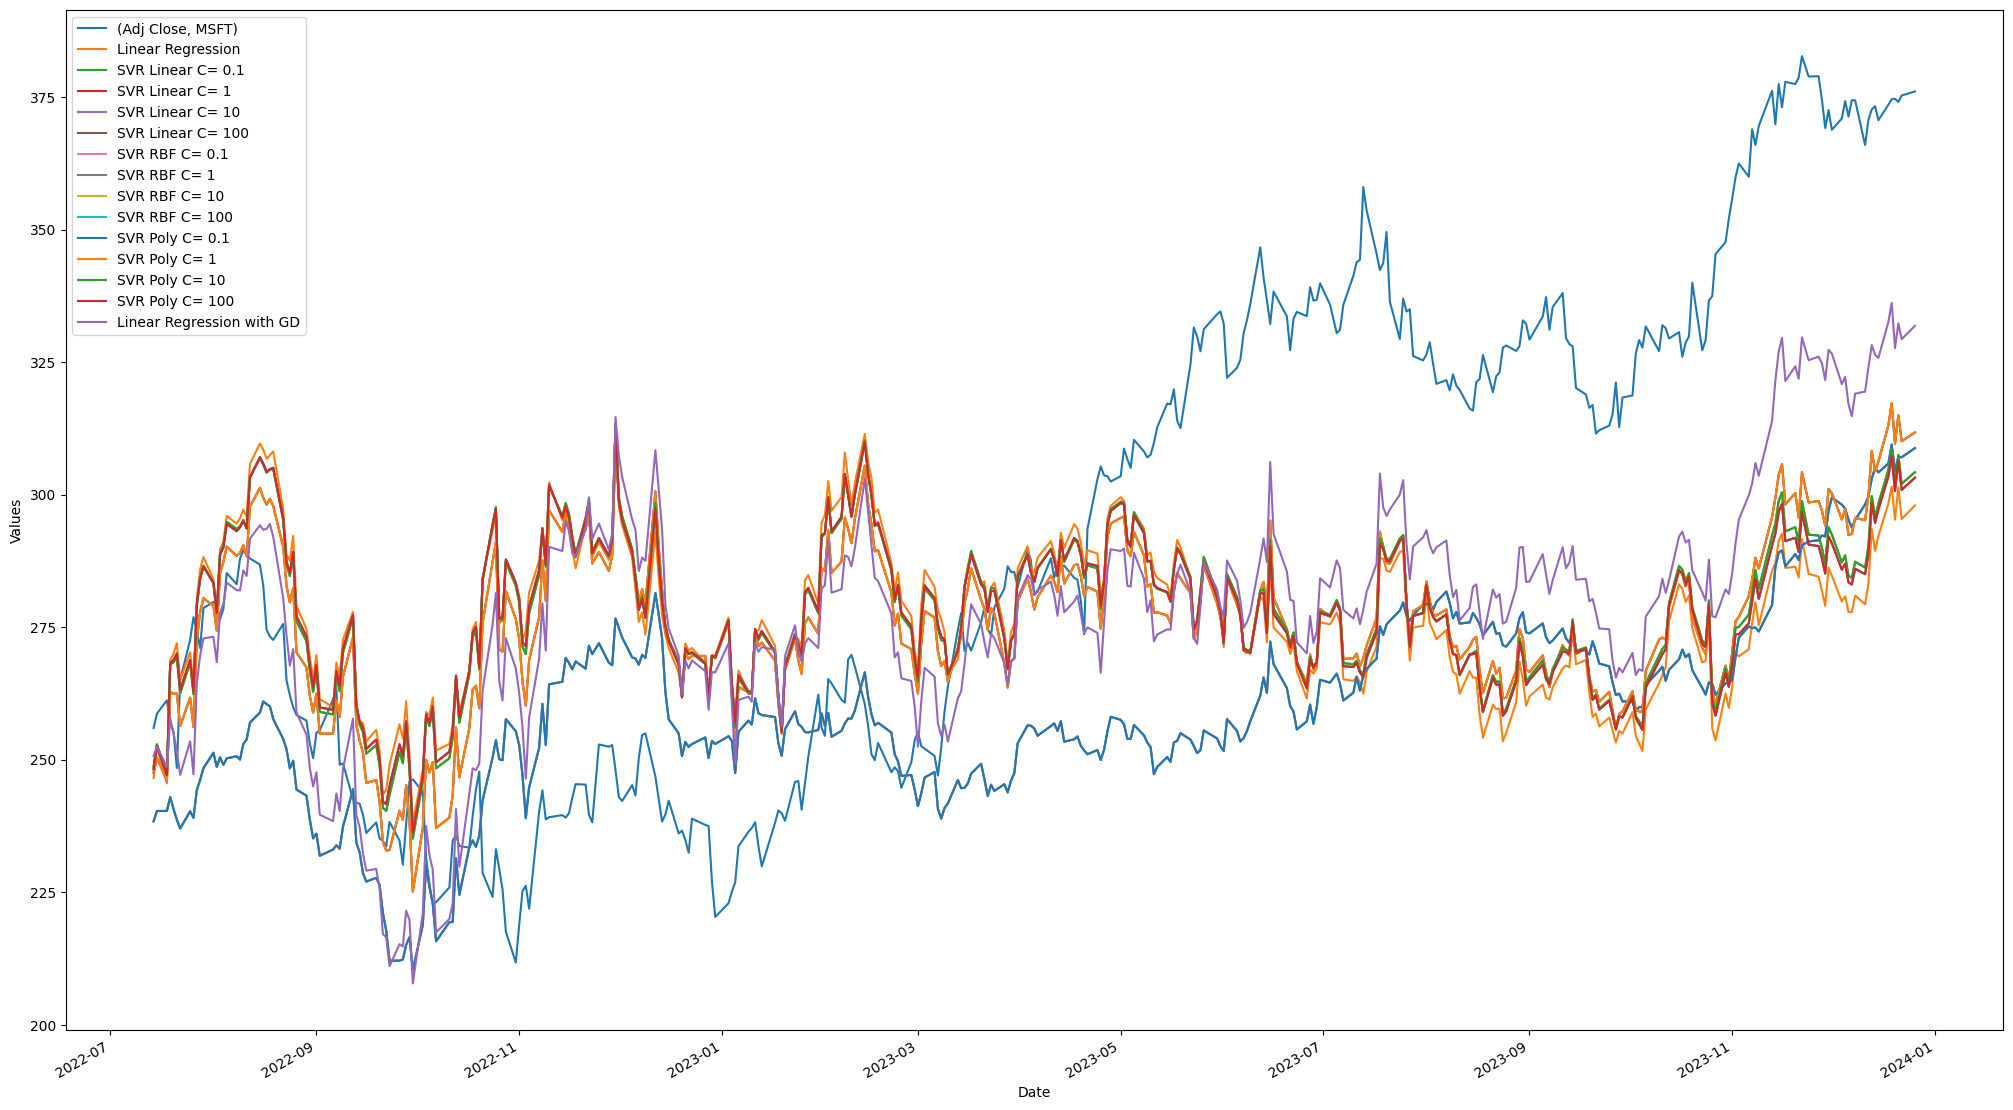



</details>

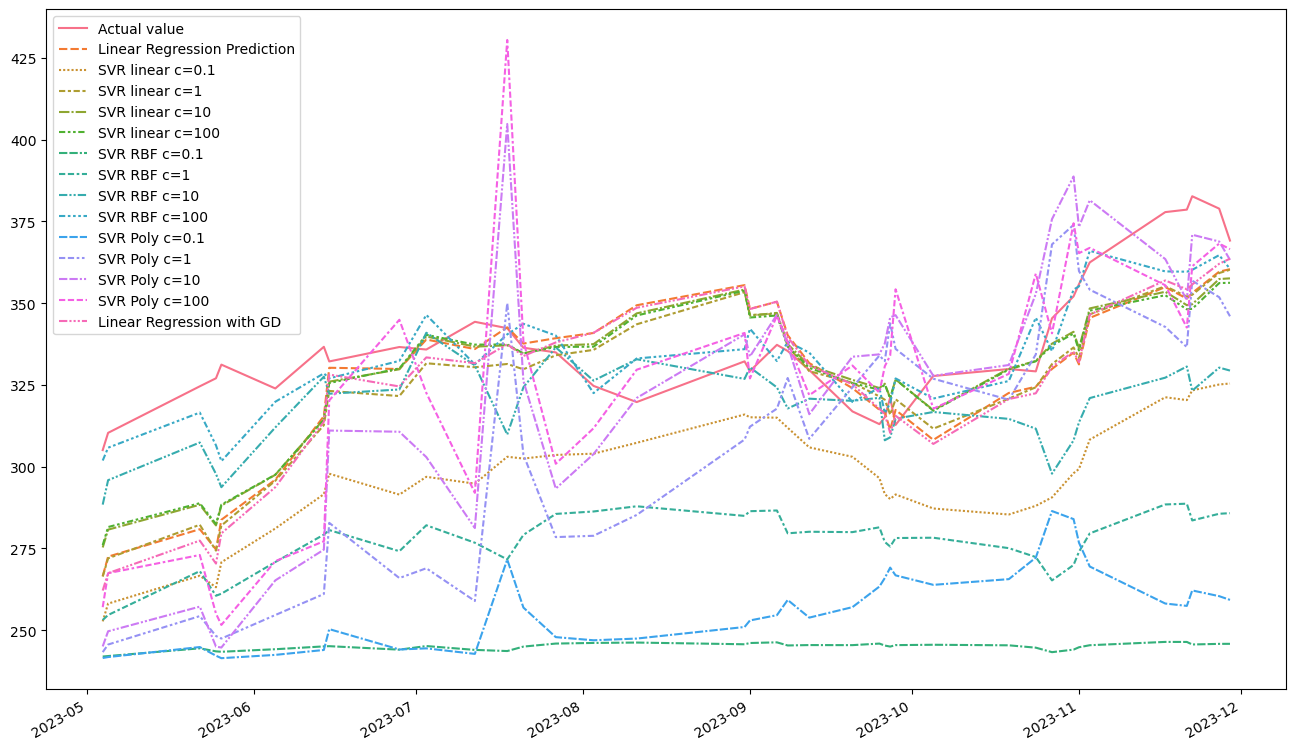

In [329]:
### START CODE HERE ###
# start_date = '2022-07-01'
# end_date = '2023-12-31'
start_date = '2023-05-01'
end_date = '2024-01-01'

data_to_plot = Prediction_df[(Prediction_df.index >= start_date) & (Prediction_df.index <= end_date)]

plt.figure(figsize=(16, 10))
sns.lineplot(data=data_to_plot)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
# plt.xlabel('Date')
# plt.ylabel('Values')
# plt.title('Comparison of Predicted and Actual Values')
plt.show()

### END CODE HERE ###

### Question
1. Rank Top 3 Models with Best prediction (Best MSE)
2. What would be the reason for large error from 2023-05 to 2024-01? 

In [ ]:
# Ans
# TOP 3 ถ้าคิดจาก BEST MSE 
# 1. SVR rbf c=100: 348.91695783986313
# 2. Linear Regression :1214.6667565862629
# 3. Gradient Descent: 1225.5864461273711

# สาเหตุที่คิดว่าอาจทำให้เกิดข้อผิดพลาดเมื่อเลือกให้แสดงกราฟตั้งแต่ 2023-05 ถึง 2024-01 คือ
# ข้อมูลระหว่างช่วงเวลานี้อาจทำให้การทำนายไม่แม่นยำ เช่น การเปลี่ยนแปลงรวดเร็วในราคาหุ้น อัตราแลกเปลี่ยนเงินตรา หรือดัชนีตลาดที่ไม่ได้ถูกจับตามรายละเอียดโดยแบบจำลอง